# Lab 5 - Kamil Pieprzycki 402037

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
_BASE_URL = "https://raw.githubusercontent.com/KAIR-ISZ/lectures/main/Data%20Analytics/Lab%205"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Airline_data.csv"
d = pd.read_csv(HOWELL_DATASET_PATH)

d
# print(d)

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [3]:
d['Miles flown [100 mln miles]'] /= 1000
d.rename(columns={'Miles flown [100 mln miles]': 'Miles flown [10e12 miles]'}, inplace=True)
d

,Year,Fatal accidents,Passenger deaths,Miles flown [10e12 miles]
0,1976,24,734,3.863
1,1977,25,516,4.300
2,1978,31,754,5.027
3,1979,31,877,5.481
4,1980,22,814,5.814
5,1981,21,362,6.033
6,1982,26,764,5.877
7,1983,20,809,6.223
8,1984,16,223,7.433
9,1985,22,1066,7.107


In [4]:
model1=CmdStanModel(stan_file='model.stan')

INFO:cmdstanpy:compiling stan file /home/lab5/model.stan to exe file /home/lab5/model
INFO:cmdstanpy:compiled model executable: /home/lab5/model
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/model.hpp /home/lab5/model.stan
Warning in '/home/lab5/model.stan', line 3, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/model.stan', line 20, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/i

In [15]:

fit = model1.sample(data={'N': len(d), 'y': d['Fatal accidents'].values, 'n': d['Miles flown [10e12 miles]'].values}, output_dir='output', seed=402037)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0  512.986       0.828945    0.099517          2.0           7.0          0.0   
1  512.692       0.793451    0.099517          2.0           7.0          0.0   
2  513.621       0.982118    0.099517          2.0           3.0          0.0   
3  513.621       0.879087    0.099517          2.0           3.0          0.0   
4  515.213       0.753493    0.099517          4.0          23.0          0.0   

   energy__    alpha     theta  lambda[1]  lambda[2]  lambda[3]  lambda[4]  \
0  -512.359  2.42904  0.375131    18.8405    19.6134    20.7971    21.4827   
1  -511.035  2.48080  0.441297    21.6973    22.7482    24.3716    25.3195   
2  -512.677  2.44171  0.405937    19.8919    20.7764    22.1365    22.9272   
3  -513.017  2.44171  0.405937    19.8919    20.7764    22.1365    22.9272   
4  -509.833  3.49394 -0.261570    23.1141    22.4751    21.5753    21.0928   

   lambda[5]  lambda[6]  lambda[7]  lambda[8

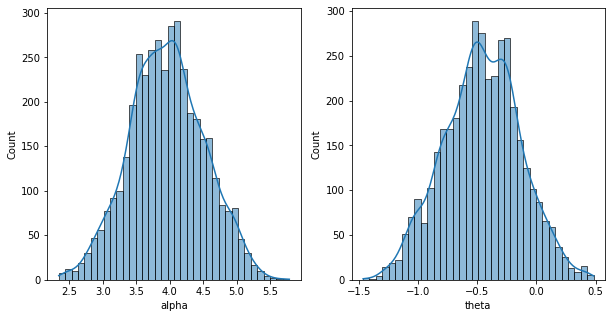

In [16]:
print(fit.draws_pd().head())
# Plot posterior distributions of alpha and theta
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(fit.draws_pd()['alpha'], kde=True, ax=axes[0])
sns.histplot(fit.draws_pd()['theta'], kde=True, ax=axes[1])
axes[0].set_xlabel('alpha')
axes[1].set_xlabel('theta')
plt.show()

In [17]:
# Compile the model
poisson_model = CmdStanModel(stan_file='model.stan')

# Set up the data dictionary
N = len(d)
data = {'N': N, 'y': d['Fatal accidents'].values, 'n': d['Miles flown [10e12 miles]'].values}

# Fit the model to the data
fit = poisson_model.sample(data=data, chains=4)

# Print summary statistics for the posterior samples
print(fit.summary())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



              Mean   MCSE  StdDev      5%     50%     95%   N_Eff  N_Eff/s  \
name                                                                         
lp__        520.00  0.031    0.92  510.00  520.00  520.00   900.0   2400.0   
alpha         3.90  0.021    0.53    3.00    4.00    4.80   640.0   1700.0   
theta        -0.45  0.012    0.31   -0.94   -0.46    0.07   650.0   1700.0   
lambda[1]    28.00  0.130    3.60   23.00   28.00   34.00   775.0   2084.0   
lambda[2]    27.00  0.089    2.70   23.00   27.00   31.00   908.0   2441.0   
lambda[3]    25.00  0.040    1.80   22.00   25.00   28.00  1927.0   5179.0   
lambda[4]    24.00  0.025    1.50   21.00   24.00   26.00  3772.0  10140.0   
lambda[5]    23.00  0.026    1.60   21.00   23.00   26.00  3504.0   9420.0   
lambda[6]    23.00  0.030    1.60   20.00   23.00   26.00  2854.0   7673.0   
lambda[7]    23.00  0.027    1.60   21.00   23.00   26.00  3324.0   8935.0   
lambda[8]    23.00  0.035    1.70   20.00   23.00   25.00  2283

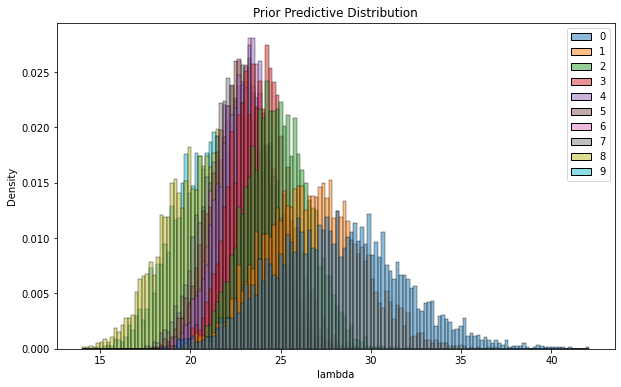

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


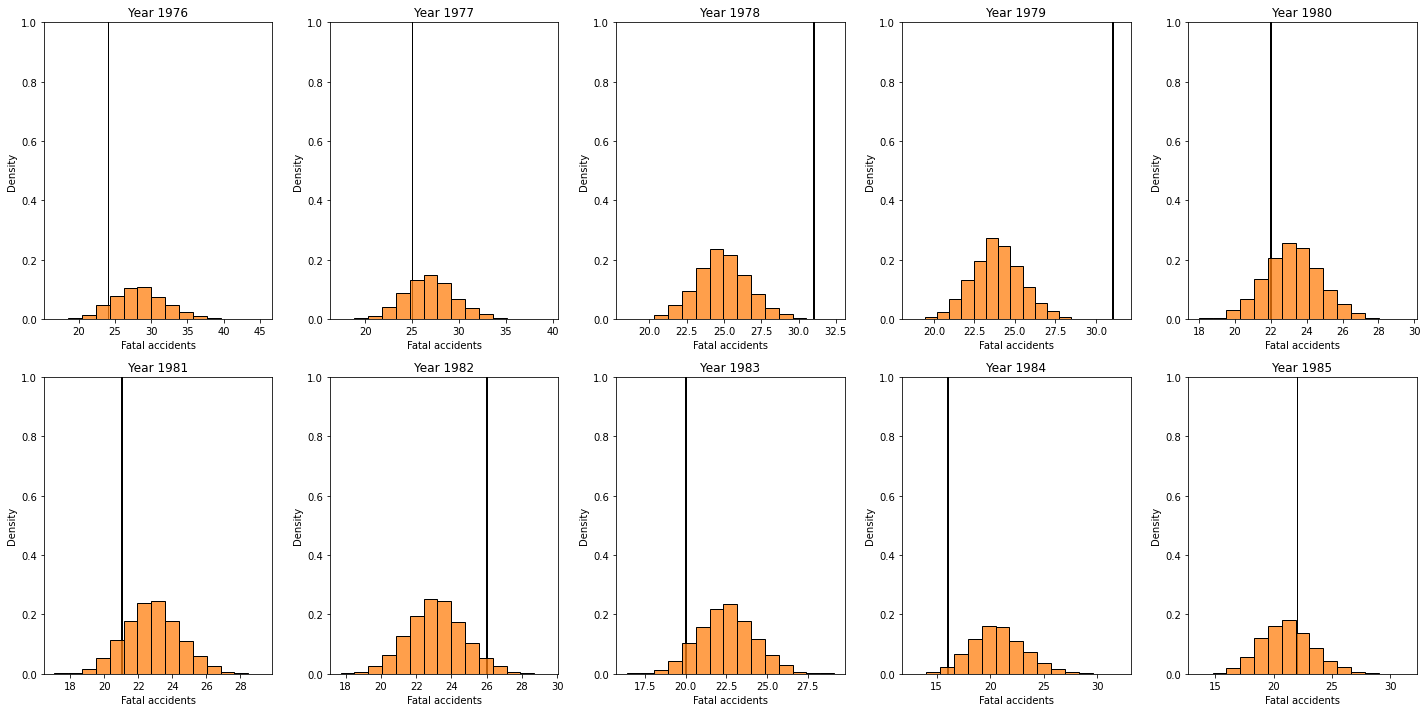

In [18]:
import seaborn as sns
# Plot the prior predictive distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(fit.draws_pd().loc[:, 'lambda[1]':'lambda[10]'].values, stat='density', ax=ax)
ax.set_xlabel('lambda')
ax.set_title('Prior Predictive Distribution')
plt.show()

# Fit the model to data
stan_data = {'N': len(d['Fatal accidents']), 'y': d['Fatal accidents'].values, 'n': d['Miles flown [10e12 miles]'].values}
fit = poisson_model.sample(data=stan_data)

# Posterior predictive analysis
posterior_pred = fit.stan_variables()['lambda']

# Compare histograms of accidents for entire period and for each year
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, year in enumerate(d['Year']):
    sns.histplot(d[d['Year'] == year]['Fatal accidents'], bins=15, stat='density', ax=axes[i])
    sns.histplot(posterior_pred[:, i], bins=15, stat='density', ax=axes[i])
    axes[i].set_xlabel('Fatal accidents')
    axes[i].set_title(f'Year {year}')
    axes[i].set_ylim(0, 1)
    
plt.tight_layout()
plt.show()